# Imports needed

In [1]:
# NumPy brings the computational power of languages like C and Fortran to Python
import numpy as np

# Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
import pandas as pd

# Print all the outputs
# from IPython.core.interactiveshell import InteractiveShell  
# InteractiveShell.ast_node_interactivity = "all"

# Generates profile reports from a pandas DataFrame.
from pandas_profiling import ProfileReport

# Function files created by us
import functions as fn

import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

# Helps to show multiple plots in the same field
%matplotlib inline

# Get database

In [2]:
# We use the cd command to move through our directories
%cd ..

C:\Users\Agus\Documents\GitHub\JAL-repo


In [3]:
# The read_excel() function allows us to import an excel and convert it into a pandas database
data = pd.read_excel("Data/creditcardmarketing.xlsx")

# EDA

## General analysis of the database with a report
We use this report to get a general idea of the database

In [4]:
# Create a report with the details of the data in addition to graphs to better understand
profile = ProfileReport(data, title="Bank Profiling Report", explorative=True)

In [5]:
# Shows the report inside field
#profile

# Shows the report created in the form of windows
#profile.to_widgets()

In [6]:
# export Report to html
#profile.to_file(output_file="Bank data profiling.html")

## Basic database analysis
We start to analyze the database to understand it better

### Visualizations

In [7]:
#Show all our database
data

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


We can see how the data has been loaded correctly

In [8]:
#It shows us the size of our database (rows,columns)
data.shape

(18000, 17)

We have 17 columns and 18000 rows

In [9]:
# The info() function print a concise summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

At first glance we can see:
- There are some null values
- Some headers are not properly formatted
- We have 3 different types of column formats, although they seem adequate to your description
- We will deal with these problems later

In [10]:
# The Head() function return the first n rows of a DataFrame
data.head(1)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0


In [11]:
# The describe() function generate descriptive statistics of a DataFrame.
data.describe()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


Everything seems to be within normality

In [12]:
# The duplicated() function return boolean Series denoting duplicate rows of a DataFrame
data.duplicated().value_counts()

False    18000
dtype: int64

No duplicate rows

In [13]:
# The dtypes() function return the dtypes in the DataFrame
data.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

Customer Number
1        1
11999    1
12005    1
12004    1
12003    1
        ..
6006     1
6007     1
6008     1
6009     1
18000    1
Name: Customer Number, Length: 18000, dtype: int64


Offer Accepted
No     16977
Yes     1023
Name: Offer Accepted, dtype: int64


Reward
Air Miles    6061
Cash Back    5999
Points       5940
Name: Reward, dtype: int64


Mailer Type
Postcard    9147
Letter      8853
Name: Mailer Type, dtype: int64


Income Level
Medium    9013
High      4526
Low       4461
Name: Income Level, dtype: int64


# Bank Accounts Open
1    13692
2     4012
3      296
Name: # Bank Accounts Open, dtype: int64


Overdraft Protection
No     15322
Yes     2678
Name: Overdraft Protection, dtype: int64


Credit Rating
High      6071
Medium    5972
Low       5957
Name: Credit Rating, dtype: int64


# Credit Cards Held
2    7944
1    6154
3    3387
4     515
Name: # Credit Cards Held, dtype: int64


# Homes Owned
1    14523
2     3292
3      185
Name: # Homes Owned, dtype: int64


Ho

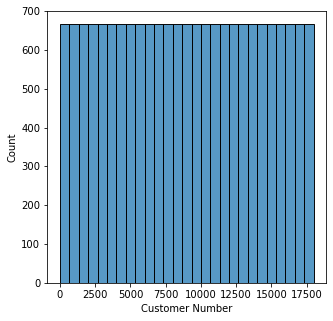

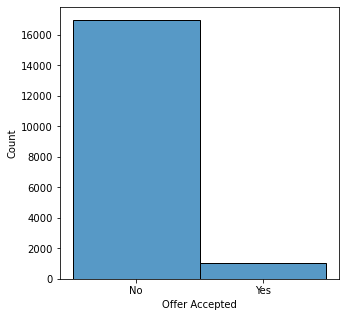

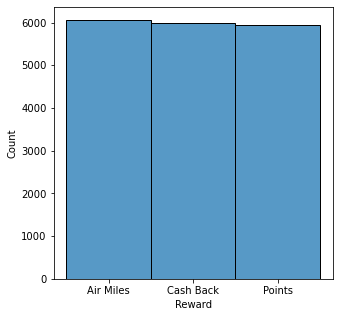

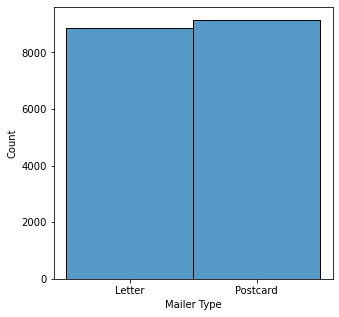

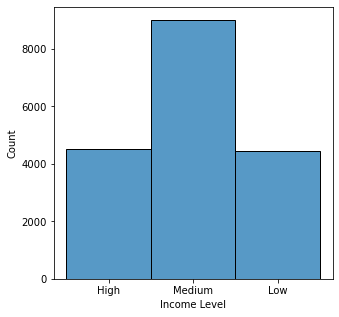

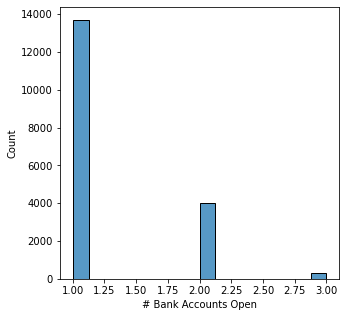

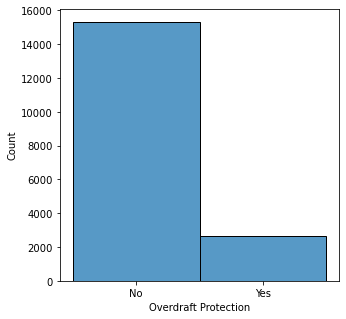

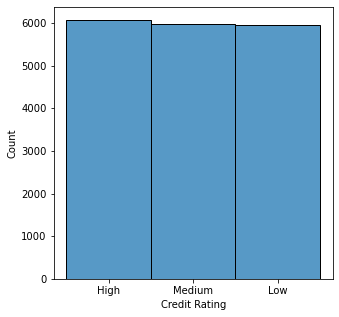

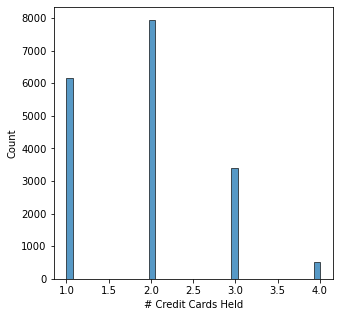

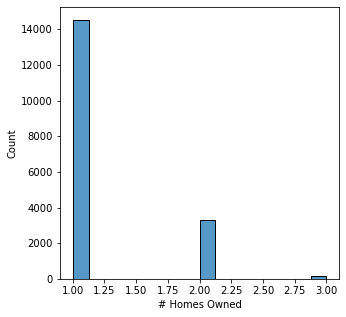

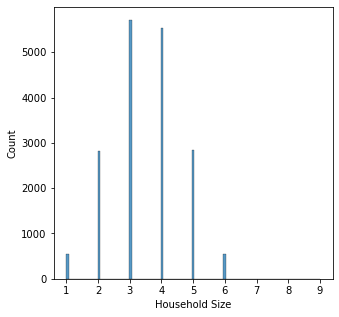

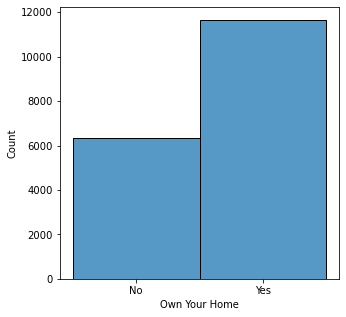

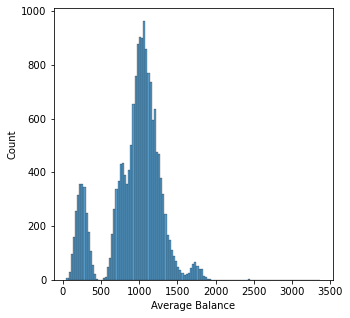

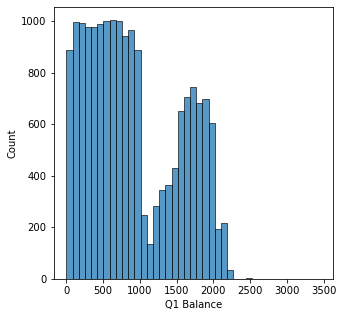

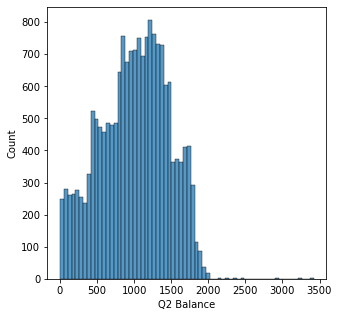

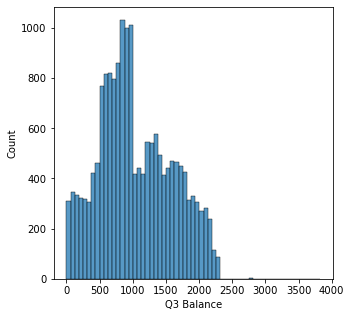

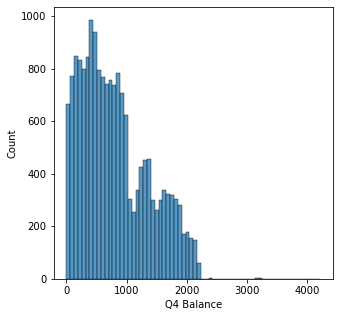

In [14]:
# This is one of our functions that returns all values_counts() and their histograms
# You can see the more detailed information in the functions.py file
fn.show_values(data)

We can see how our data is highly imbalanced

### Deal with nulls

In [15]:
# The isnull() function detect missing values
# we use sum() funtion to see the values grouped by columns
data.isnull().sum()


Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [16]:
data.shape

(18000, 17)

In [17]:
# As there are only 24 rows within the 18000 we have decided to dispense with those values
# To drop any rows that contain any null values
data.dropna(inplace=True)

In [18]:
# Show the result
data.isnull().sum()


Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
dtype: int64

In [19]:
data.shape

(17976, 17)

### Deal with headers

In [20]:
# The Head() function return the first n rows of a DataFrame
data.head(5)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [21]:
# Using str.replace() to normalize the headers,we eliminate the symbols and spaces
data.columns = data.columns.str.replace('[#, ]', '')

C:\Users\Agus\AppData\Local\Temp/ipykernel_9632/1119041155.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[#, ]', '')


In [22]:
# We show the result
data.head(5)

,CustomerNumber,OfferAccepted,Reward,MailerType,IncomeLevel,BankAccountsOpen,OverdraftProtection,CreditRating,CreditCardsHeld,HomesOwned,HouseholdSize,OwnYourHome,AverageBalance,Q1Balance,Q2Balance,Q3Balance,Q4Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


### Deal with Outliers

In [23]:
#we have decided to remove these two conditions because there is only one of each among 18000 rows
data = data.drop(data[data['HouseholdSize']==8].index)
data = data.drop(data[data['HouseholdSize']==9].index)

### First conclusions
Let's make a first compilation of what we have learned so far about our database
- Only 1,021 of 18,000 have accepted the offer, that's 5.67% of the total
- There are three types of Reward and they are distributed with about 6000, thats 33% per each
- There are two types of MailerType and they are distributed with about 9000, that's 50% for each
- There are three types of IncomeLevel but -medium- stands out from the others by doubling them
- The great majority of clients only have 1 bank account with a total of 13674, thats 75.96%
- The great majority of clients dont have OverdraftProtectiont with a total of 15300, thats 85%
- There are three types of CreditRating and they are distributed with about 6000, thats 33% per each
- There are four types of CreditCardsHeld, most have 1 or 2 with the 78%
- There are three types of HomesOwned, most have 1 with 80.56%
- There are 9 types of HouseholdSize, 3, 4, 5, 2 contain a 94.01%
- 64.64% of the clients have their own house
- The average salary of the clients is 940.51

## Analyzing the database in depth

### Correlacion Matrix

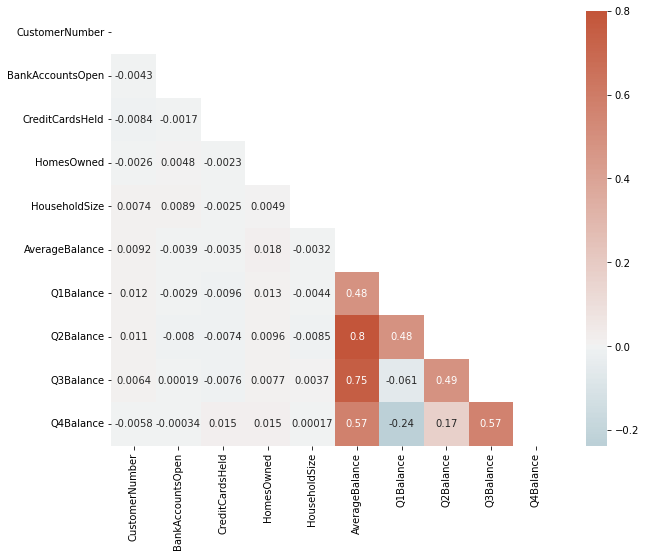

In [24]:
fn.matrix_correlation (data)

# Training

## Select target

In [25]:
# Separate our goal
y = data['OfferAccepted']
# We select the most relevant columns for our prediction
X = data.drop(['OfferAccepted','CustomerNumber','Q1Balance','Q2Balance','Q3Balance','Q4Balance'],axis=1)

In [26]:
# Now we return to separate our data into numerical and categorical to be able to treat them separately
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=object)

X_num.shape



(17974, 5)

In [27]:
X_cat.shape

(17974, 6)

In [28]:
y.shape

(17974,)

## Logistic Regresion Model

### Scaling categorical values

In [29]:
# Convert categorical variable into dummy/indicator variables.
X_cat_dummies=pd.get_dummies(X_cat, drop_first=True)
X_cat_dummies

,Reward_Cash Back,Reward_Points,MailerType_Postcard,IncomeLevel_Low,IncomeLevel_Medium,OverdraftProtection_Yes,CreditRating_Low,CreditRating_Medium,OwnYourHome_Yes
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,1
2,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,1,0,1
17996,1,0,0,0,0,0,1,0,1
17997,1,0,0,0,0,0,1,0,0
17998,1,0,0,0,1,0,0,1,1


### Scaling numeric values

In [30]:
# This is one of our functions that return a database list with all the values scaled
# You can see the more detailed information in the functions.py file
scalers = fn.all_scalers(X_num)

### Making Samples

In [31]:
X_final = pd.concat([X_cat_dummies,X_num], axis=1)
X_sam, y_sam = fn.smote_sample (X_final,y)

### Fit model

#### Without scaling numerical values

In [32]:
# We reassemble the data
X_final = pd.concat([X_cat_dummies,X_num], axis=1)

Accuracy of LogisticRegresion: 0.9417763767847209


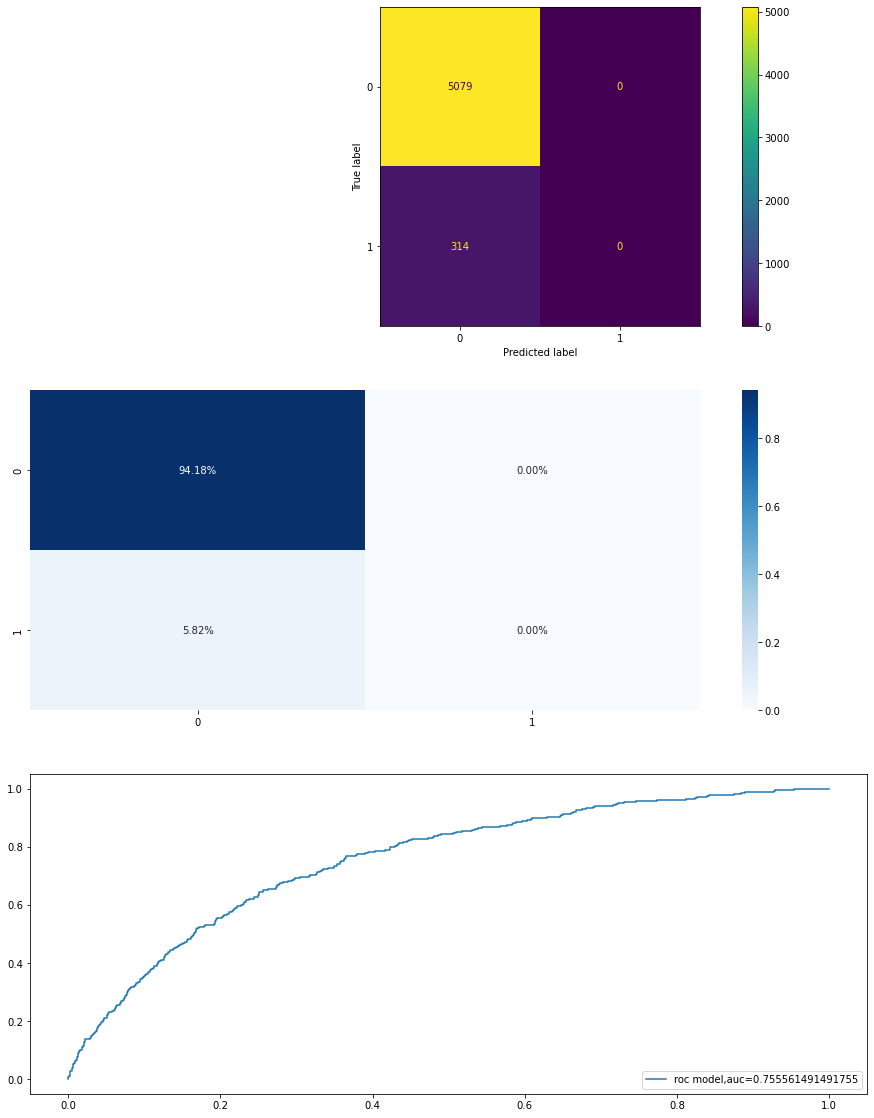

0.9417763767847209

In [33]:
# This is one of our functions that return the results of analysis
# You can see the more detailed information in the functions.py file
fn.logistic_regresion_train (X_final,y,1)

#### With scaler numerical values

We can try to improve our model by applying scaling techniques on the numerical variables

In [34]:
# We reassemble the data, but now with Scaled values
X_full = []
for i in range(len(scalers)):
    X_full.append(pd.concat([X_cat_dummies,scalers[i]], axis=1))

Numerical values sampled with: MinMaxScaler
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0                1

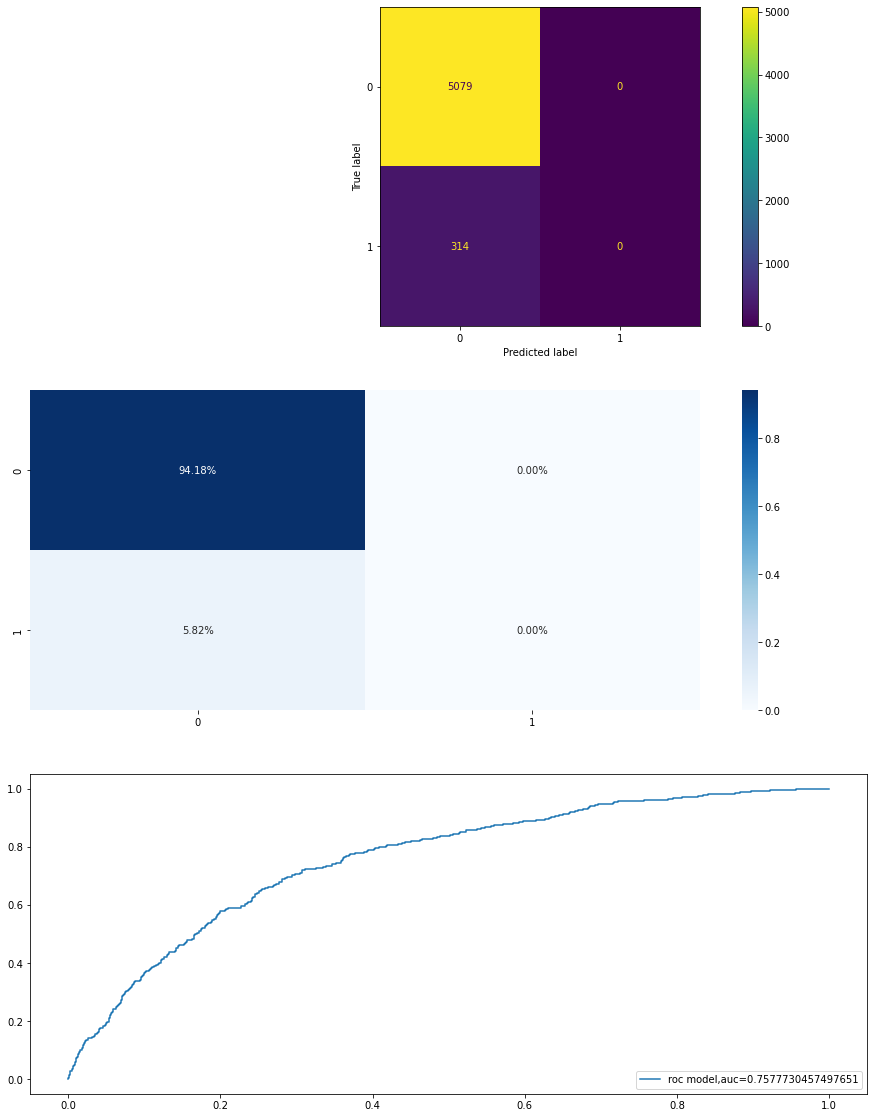


Numerical values sampled with: MaxAbsScaler
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0                

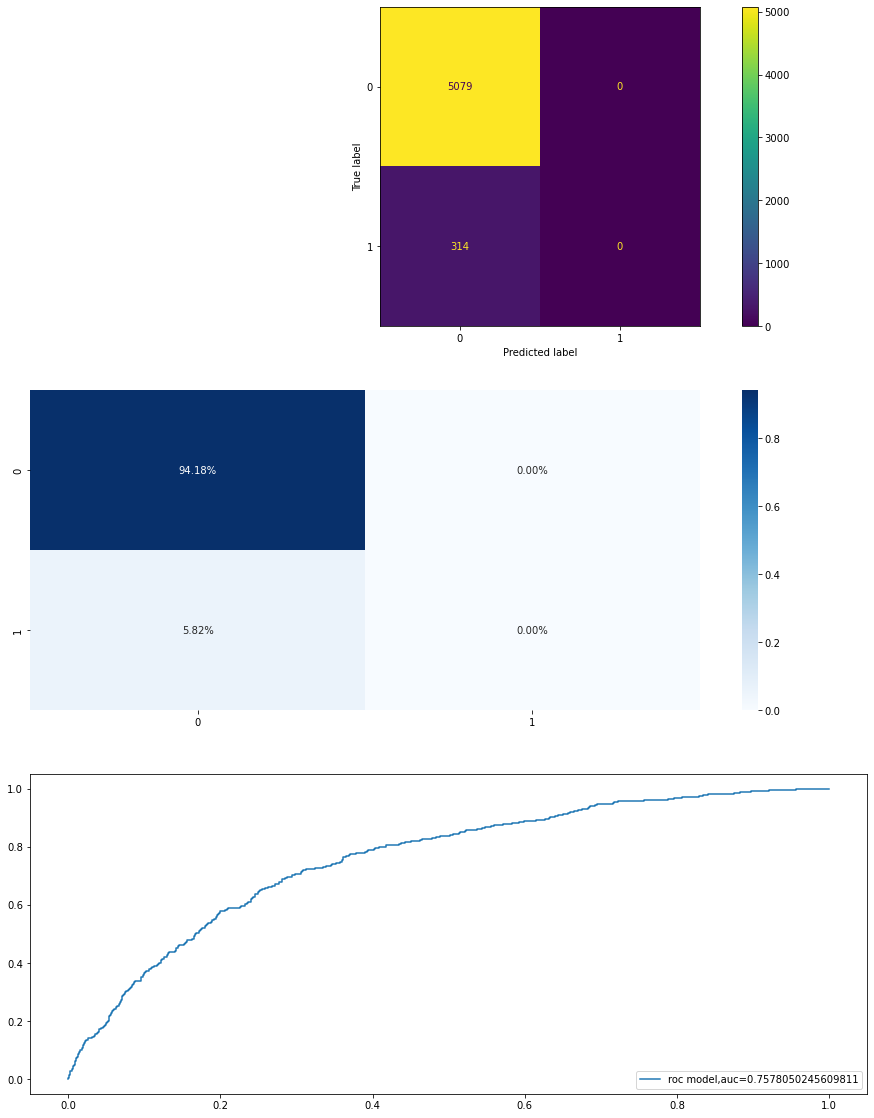


Numerical values sampled with: StandardScaler
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0              

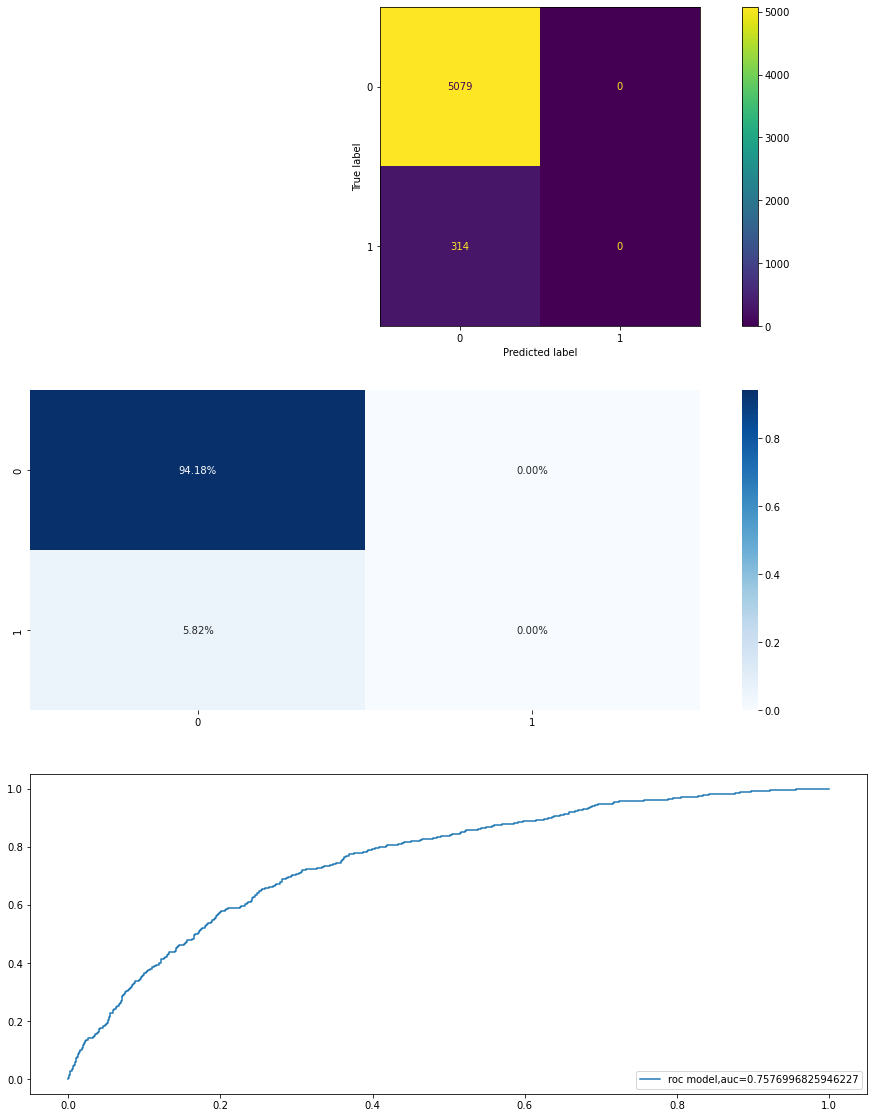


Numerical values sampled with: RobustScaler
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0                

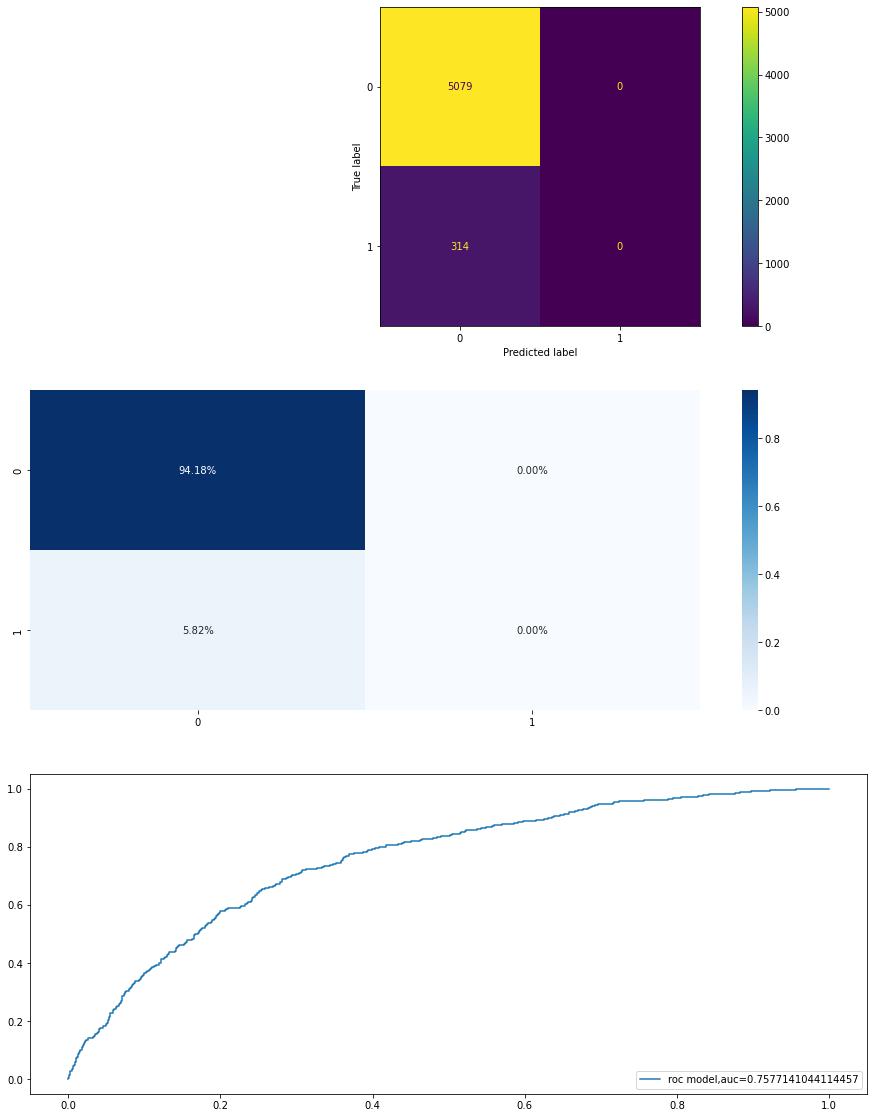


Numerical values sampled with: Normalizer
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0                1 

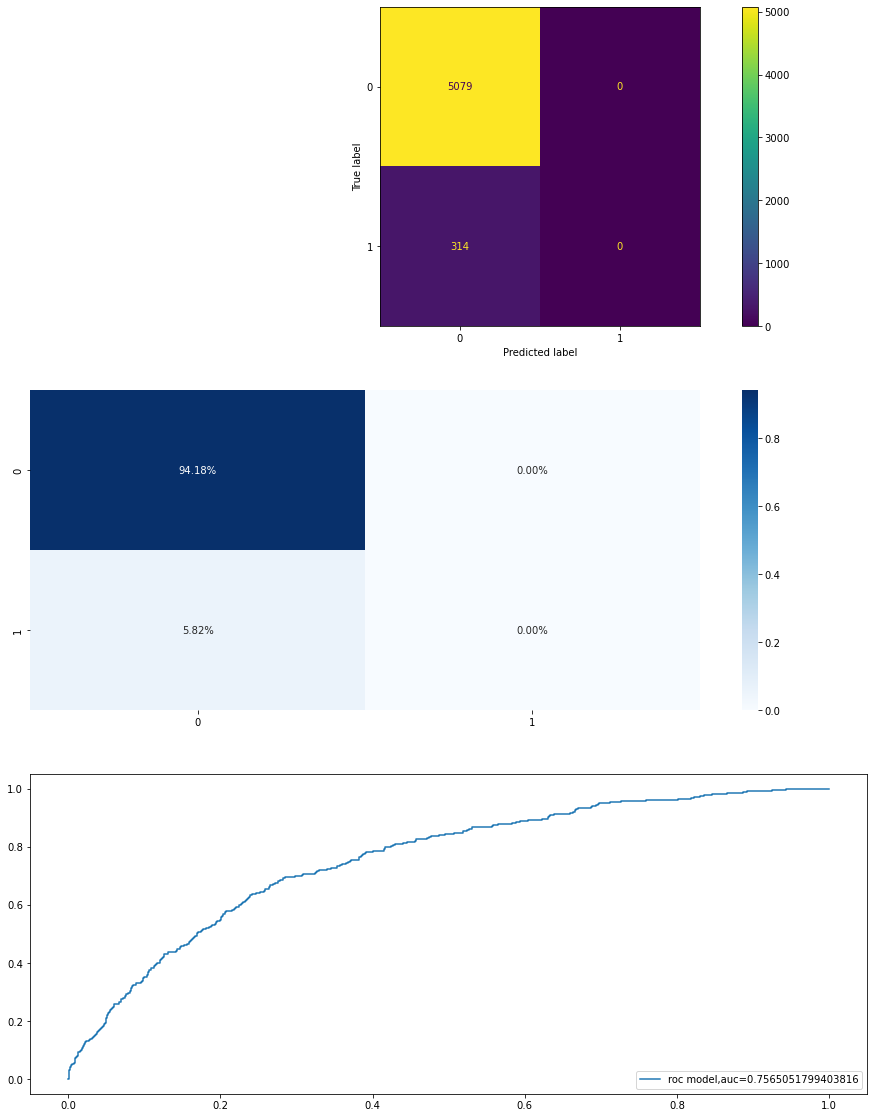


Numerical values sampled with: QuantileTransformer
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0         

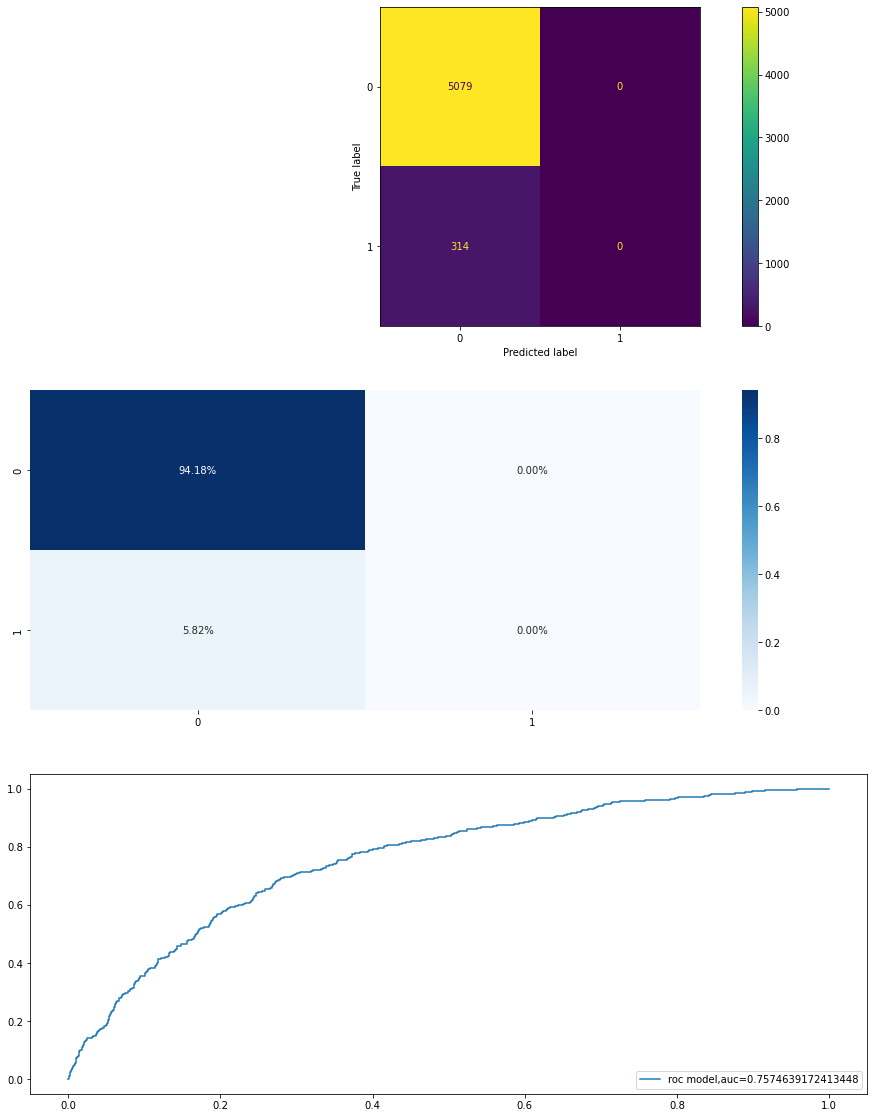


Numerical values sampled with: PowerTransformer
       Reward_Cash Back  Reward_Points  MailerType_Postcard  IncomeLevel_Low  \
0                     0              0                    0                0   
1                     0              0                    0                0   
2                     0              0                    1                0   
3                     0              0                    0                0   
4                     0              0                    0                0   
...                 ...            ...                  ...              ...   
17995                 1              0                    0                0   
17996                 1              0                    0                0   
17997                 1              0                    0                0   
17998                 1              0                    0                0   
17999                 1              0                    0            

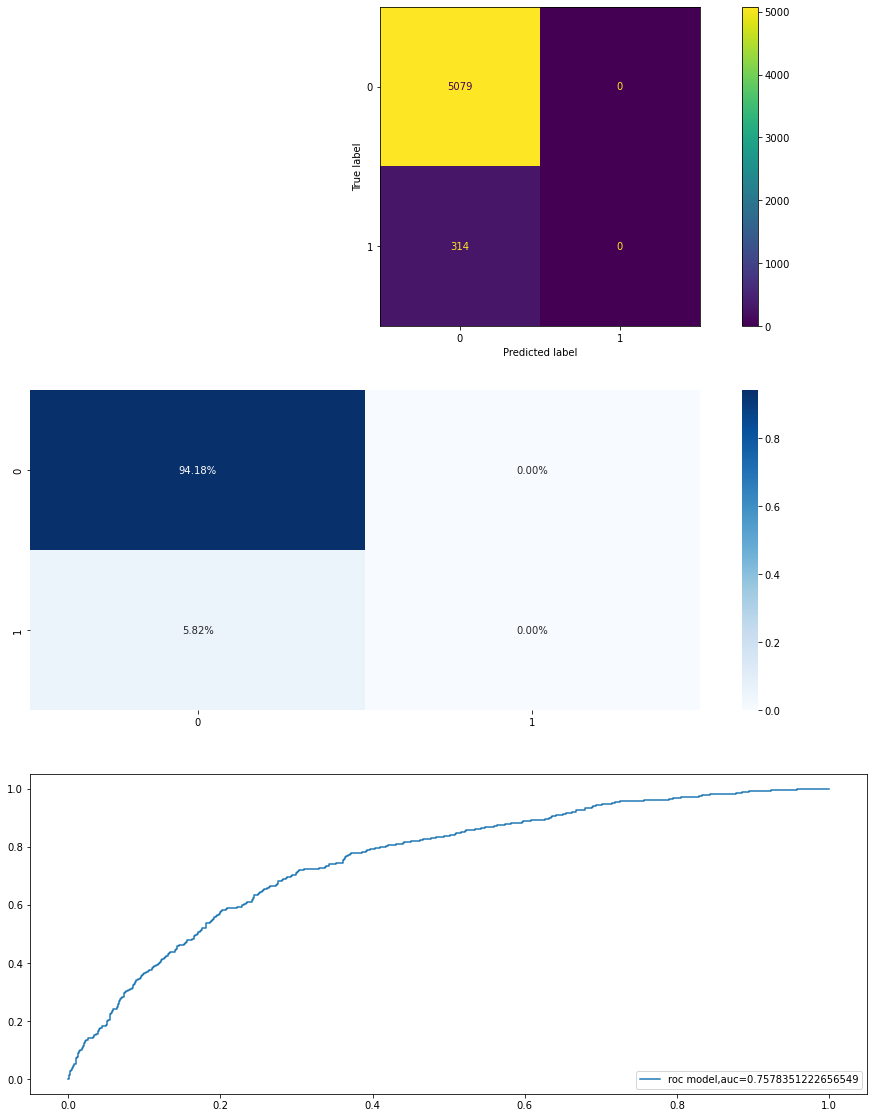

In [35]:
# This is one of our functions that return the results of analysis for each scaler
# You can see the more detailed information in the functions.py file
result_fn = fn.logistic_regresion_full (X_full,y,1)

In [36]:
# Show results
result_fn

,Scaler,Accuracy
0,MinMaxScaler,0.941776
1,MaxAbsScaler,0.941776
2,StandardScaler,0.941776
3,RobustScaler,0.941776
4,Normalizer,0.941776
5,QuantileTransformer,0.941776
6,PowerTransformer,0.941776


#### Check for understanding

As we can see, it does not matter what type of scale we use, it always gives us the same accuracy.
Let's see what's happening

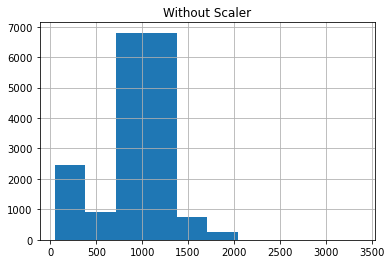

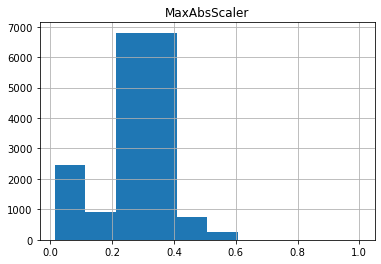

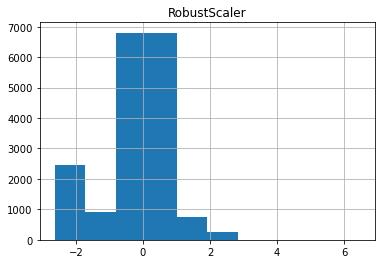

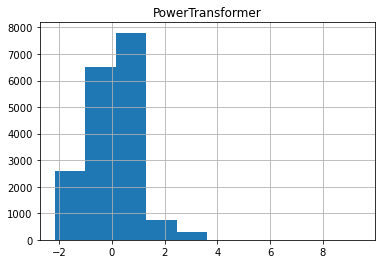

In [37]:
# Let's compare the original value of column AverageBalance with some scaled values
X_num['AverageBalance'].hist()
plt.title("Without Scaler")
plt.show()
X_full[1]['AverageBalance'].hist()
plt.title("MaxAbsScaler")
plt.show()
X_full[3]['AverageBalance'].hist()
plt.title("RobustScaler")
plt.show()
X_full[6]['AverageBalance'].hist()
plt.title("PowerTransformer")
plt.show()

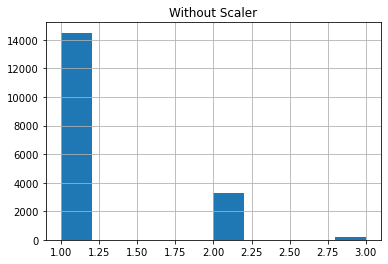

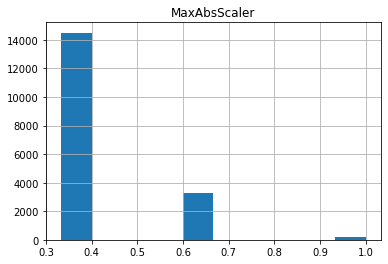

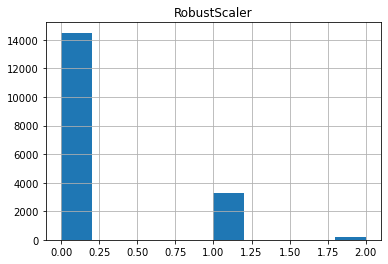

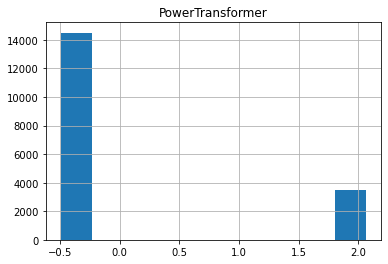

In [38]:
# Let's compare the original value of column HomesOwned with some scaled values
X_num['HomesOwned'].hist()
plt.title("Without Scaler")
plt.show()
X_full[1]['HomesOwned'].hist()
plt.title("MaxAbsScaler")
plt.show()
X_full[3]['HomesOwned'].hist()
plt.title("RobustScaler")
plt.show()
X_full[6]['HomesOwned'].hist()
plt.title("PowerTransformer")
plt.show()

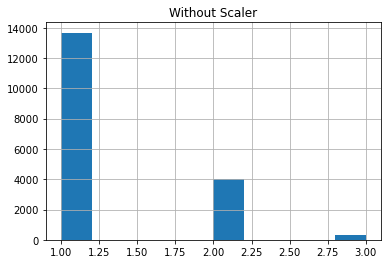

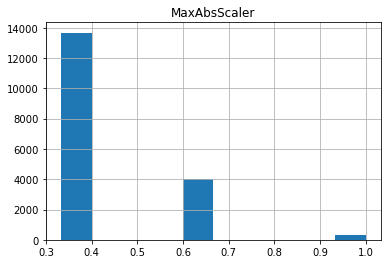

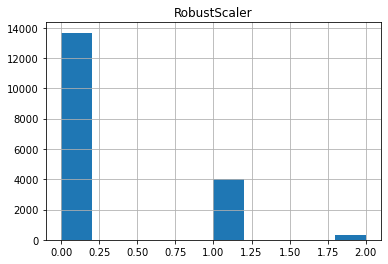

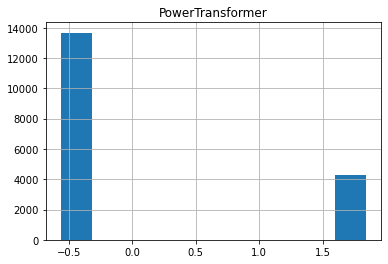

In [39]:
# Let's compare the original value of column BankAccountsOpen with some scaled values
X_num['BankAccountsOpen'].hist()
plt.title("Without Scaler")
plt.show()
X_full[1]['BankAccountsOpen'].hist()
plt.title("MaxAbsScaler")
plt.show()
X_full[3]['BankAccountsOpen'].hist()
plt.title("RobustScaler")
plt.show()
X_full[6]['BankAccountsOpen'].hist()
plt.title("PowerTransformer")
plt.show()

#### With Samples

Accuracy of LogisticRegresion: 0.8174579769979358


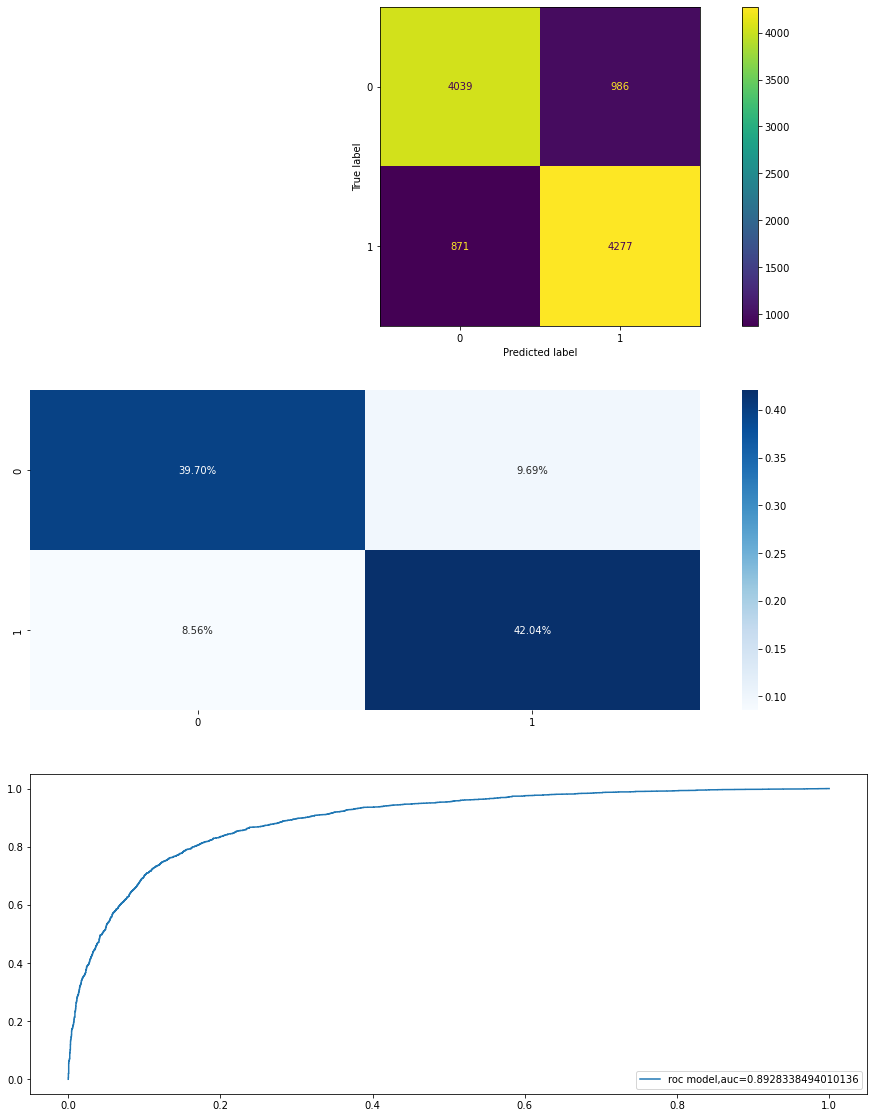

0.8174579769979358

In [40]:
fn.logistic_regresion_train (X_sam,y_sam,1)

### Conclusions

- Although the accuracy is very high with 94%, when we apply the scaling methods, the accuracy remains the same and not only for one but for all of them.
- This is highly unusual. If we look better at the graphs we can see that they all have the same structure, the only thing that changes is the scale in which they are shown.
- This means that the scaling methods are not doing anything and as a consequence we could make the same predictions without applying any model.
- This model doesn't usually work well with imbalanced data. 
- In other words, the logistic regression model does not seem adequate to deal with this case study.

## KNN Model

### Scaling categorical values

In [41]:
# Convert categorical variable into dummy/indicator variables.
X_cat_dummies = pd.get_dummies(X_cat, drop_first=True)
X_cat_dummies

,Reward_Cash Back,Reward_Points,MailerType_Postcard,IncomeLevel_Low,IncomeLevel_Medium,OverdraftProtection_Yes,CreditRating_Low,CreditRating_Medium,OwnYourHome_Yes
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,1
2,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,1,0,1
17996,1,0,0,0,0,0,1,0,1
17997,1,0,0,0,0,0,1,0,0
17998,1,0,0,0,1,0,0,1,1


### Scaling numeric values

In [42]:
# This is one of our functions that return a scaled database
# You can see the more detailed information in the functions.py file
# We use the scaler MaxMinScaler because it is one of the most recommended for the KNN model.
Xmaxmin = fn.maxmin_scaler(X_num)

### Making Samples

In [43]:
X_final = pd.concat([X_cat_dummies,X_num], axis=1)
X_sam, y_sam = fn.tomek_sample (X_final,y)

### Fit model

#### Without scaler numerical values

In [93]:
# We reassemble the data
X_final = pd.concat([X_cat_dummies,X_num], axis=1)

Accuracy of LogisticRegresion: 0.9404783979232338


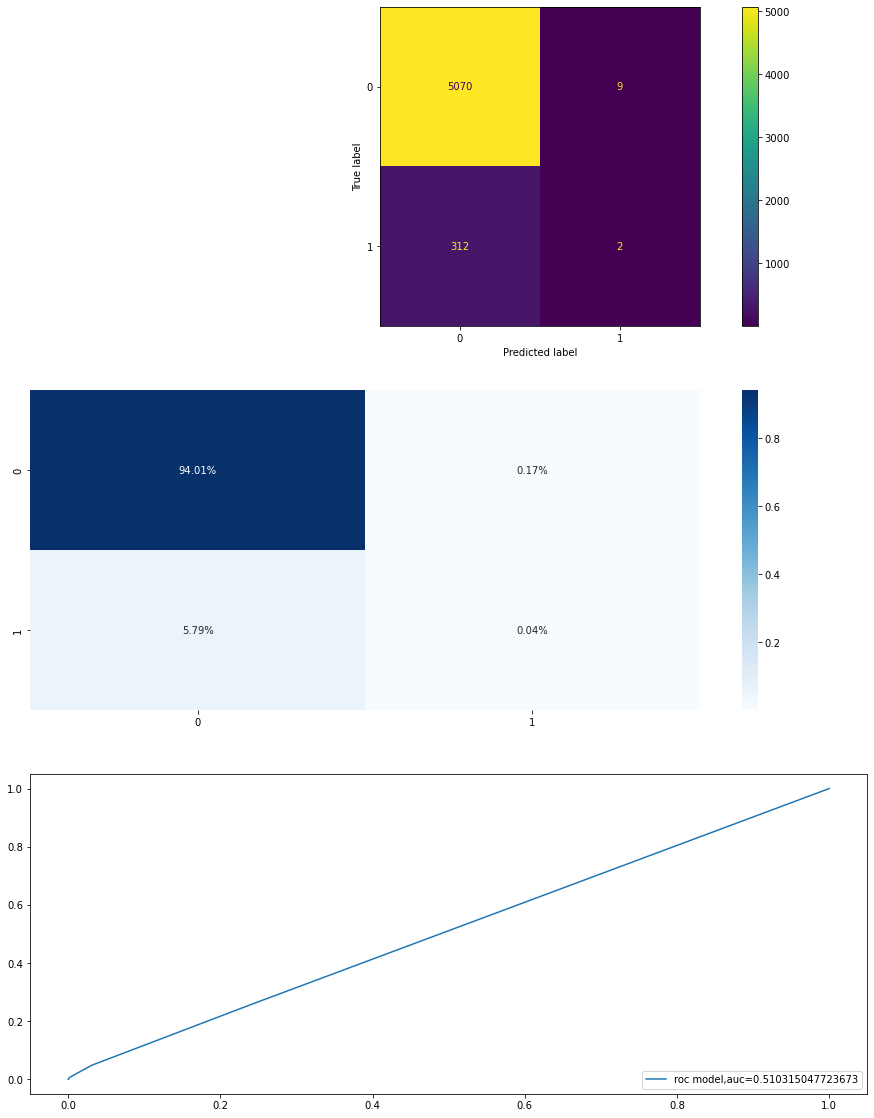

0.9404783979232338

In [44]:
fn.knn_train (X_final,y,1)

In [45]:
# split our data
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.30,random_state=40)
# apply and train KNeighborsClassifier
Knn = KNeighborsClassifier()
Knn.fit(X_train,y_train)
# calculate accuracy
y_pred = Knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of KNN:",accuracy)

Accuracy of KNN: 0.9404783979232338


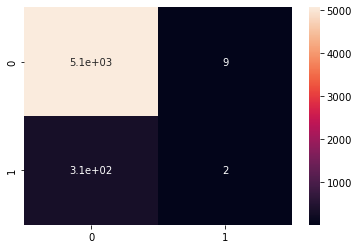

In [46]:
# calculate confusion matrix and plot
c_m = confusion_matrix(y_test,y_pred)
sns.heatmap(c_m, annot=True)
plt.show()

<AxesSubplot:>

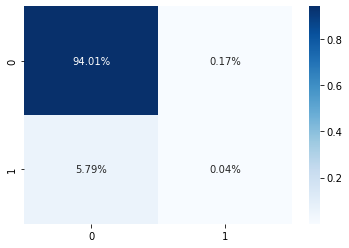

In [47]:
sns.heatmap(c_m/np.sum(c_m), annot=True, fmt='.2%',cmap='Blues')

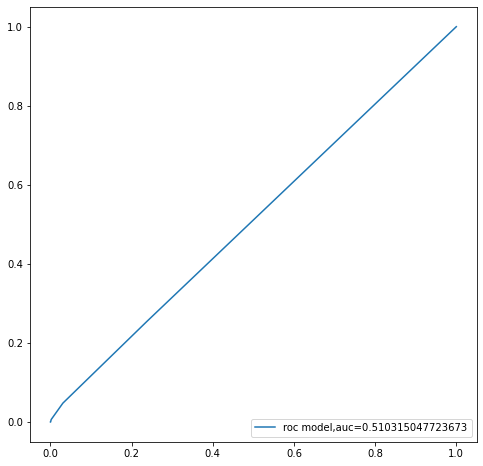

In [48]:
y_test = y_test.apply(fn.yes_no_to_0_1)
y_pred_probs=Knn.predict_proba(X_test)[::,1]
#roc_curve plot
fpr,tpr, _ = roc_curve(y_test,y_pred_probs)
auc=roc_auc_score(y_test,y_pred_probs)
fig, (ax) = plt.subplots(1,1, figsize=(8, 8))  
ax.plot(fpr,tpr,label='roc model,auc='+str(auc))
ax.legend(loc=4)
plt.show()

#### With scaler numerical values

We can try to improve our model by applying scaling techniques on the numerical variables

In [49]:
# We reassemble the data, but now with Scaled values
X_final = pd.concat([X_cat_dummies,Xmaxmin], axis=1)

In [50]:
# split our data
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.30,random_state=40)
# apply and train KNeighborsClassifier
Knn = KNeighborsClassifier()
Knn.fit(X_train,y_train)
# calculate accuracy
y_pred = Knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of KNN:",accuracy)

Accuracy of KNN: 0.9391804190617468


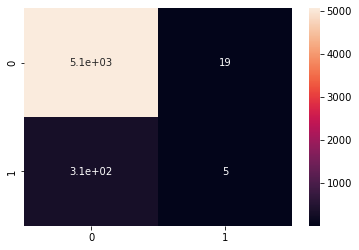

In [51]:
# calculate confusion matrix and plot
c_m = confusion_matrix(y_test,y_pred)
sns.heatmap(c_m, annot=True)
plt.show()

<AxesSubplot:>

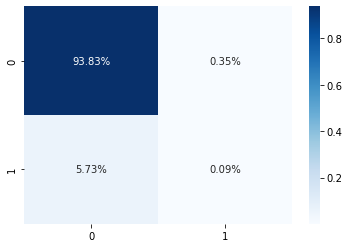

In [52]:
sns.heatmap(c_m/np.sum(c_m), annot=True, fmt='.2%',cmap='Blues')

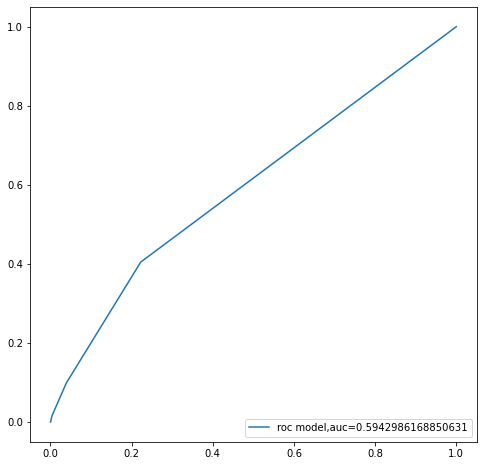

In [53]:
y_test1 = y_test.apply(fn.yes_no_to_0_1)
fig, (ax) = plt.subplots(1,1, figsize=(8, 8))  
y_pred_probs=Knn.predict_proba(X_test)[::,1]
#roc_curve plot
fpr,tpr, _ = roc_curve(y_test1,y_pred_probs)
auc=roc_auc_score(y_test1,y_pred_probs)
ax.plot(fpr,tpr,label='roc model,auc='+str(auc))
ax.legend(loc=4)
plt.show()

#### Looking for the best k

We can also try to find the most optimal K for our model and try it again

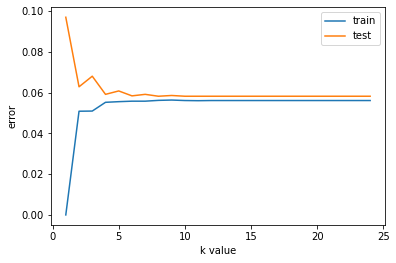

In [54]:
error_train = []
error_test = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1=knn.predict(X_train)
    error_train.append(np.mean(y_train!=y_pred1))
    y_pred2=knn.predict(X_test)
    error_test.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,25),error_train,label='train')
plt.plot(range(1,25),error_test,label='test')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend()

In [55]:
# split our data, X_final is scaled
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.30,random_state=40)
# apply and train KNeighborsClassifier
# this time we will put n_neighbors = 4
Knn = KNeighborsClassifier(n_neighbors = 4)
Knn.fit(X_train,y_train)
# calculate accuracy
y_pred = Knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of KNN:",accuracy)

Accuracy of KNN: 0.9408492490265159


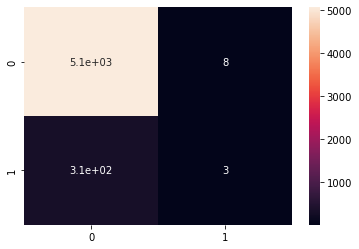

In [56]:
# calculate confusion matrix and plot
c_m = confusion_matrix(y_test,y_pred)
sns.heatmap(c_m, annot=True)
plt.show()

<AxesSubplot:>

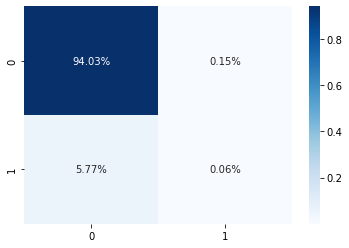

In [57]:
sns.heatmap(c_m/np.sum(c_m), annot=True, fmt='.2%',cmap='Blues')

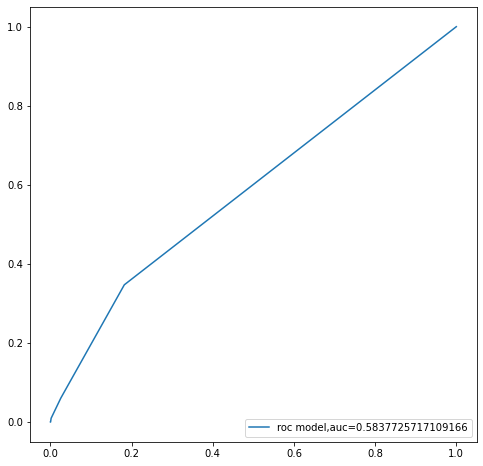

In [58]:
y_test = y_test.apply(fn.yes_no_to_0_1)
fig, (ax) = plt.subplots(1,1, figsize=(8, 8))  
y_pred_probs=Knn.predict_proba(X_test)[::,1]
#roc_curve plot
fpr,tpr, _ = roc_curve(y_test,y_pred_probs)
auc=roc_auc_score(y_test,y_pred_probs)
ax.plot(fpr,tpr,label='roc model,auc='+str(auc))
ax.legend(loc=4)
plt.show()

#### With Samples

In [59]:
# split our data, X_final is scaled
X_train,X_test,y_train,y_test=train_test_split(X_sam,y_sam,test_size=0.30,random_state=40)
# apply and train KNeighborsClassifier
# this time we will put n_neighbors = 4
Knn = KNeighborsClassifier(n_neighbors = 4)
Knn.fit(X_train,y_train)
# calculate accuracy
y_pred = Knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of KNN:",accuracy)

Accuracy of KNN: 0.9376781303439103


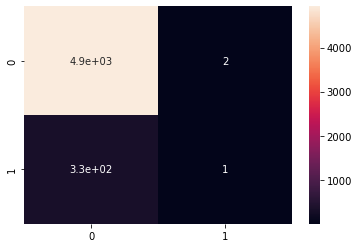

In [60]:
# calculate confusion matrix and plot
c_m = confusion_matrix(y_test,y_pred)
sns.heatmap(c_m, annot=True)
plt.show()

<AxesSubplot:>

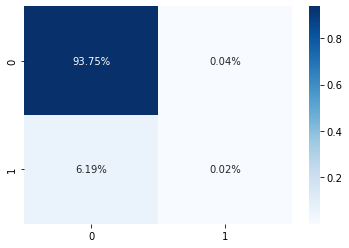

In [61]:
sns.heatmap(c_m/np.sum(c_m), annot=True, fmt='.2%',cmap='Blues')

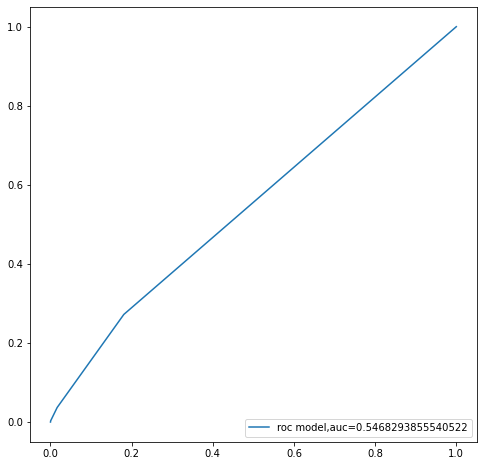

In [62]:
y_test = y_test.apply(fn.yes_no_to_0_1)
fig, (ax) = plt.subplots(1,1, figsize=(8, 8))  
y_pred_probs=Knn.predict_proba(X_test)[::,1]
#roc_curve plot
fpr,tpr, _ = roc_curve(y_test,y_pred_probs)
auc=roc_auc_score(y_test,y_pred_probs)
ax.plot(fpr,tpr,label='roc model,auc='+str(auc))
ax.legend(loc=4)
plt.show()

### Conclusions

es ligeramente mejor xq si q nos da algunos valosres positivos

## Random Forest Model

Scaling is not necessary for random forests. The nature of RF is such that convergence and numerical precision issues, aren't so important.

### Fit Model

In [63]:
# We reassemble the data
X_final = pd.concat([X_cat_dummies,X_num], axis=1)

In [64]:
# split our data
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.30,random_state=40)
# apply and train KNeighborsClassifier
Kforest=RandomForestClassifier(n_estimators=100)
Kforest.fit(X_train,y_train)
# calculate accuracy
y_pred = Kforest.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of RandomForestClassifier:",accuracy)

Accuracy of RandomForestClassifier: 0.9347302058223623


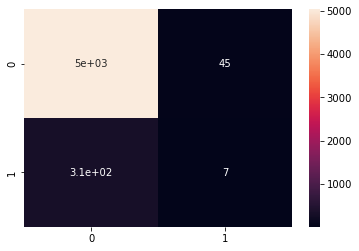

In [65]:
c_m = confusion_matrix(y_test,y_pred)
sns.heatmap(c_m, annot=True)
plt.show()

<AxesSubplot:>

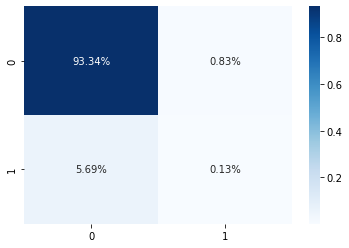

In [66]:
sns.heatmap(c_m/np.sum(c_m), annot=True, fmt='.2%',cmap='Blues')

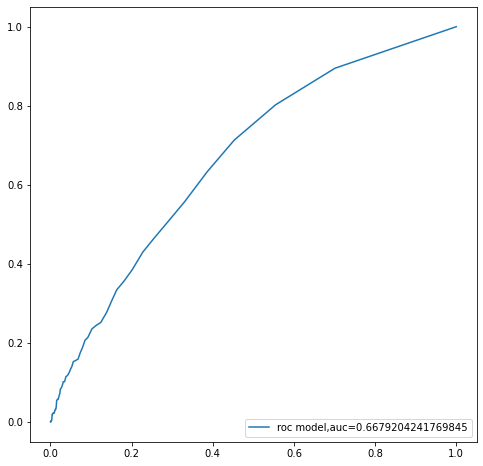

In [67]:
y_test = y_test.apply(fn.yes_no_to_0_1)
fig, (ax) = plt.subplots(1,1, figsize=(8, 8))  
y_pred_probs=Kforest.predict_proba(X_test)[::,1]
#roc_curve plot
fpr,tpr, _ = roc_curve(y_test,y_pred_probs)
auc=roc_auc_score(y_test,y_pred_probs)
ax.plot(fpr,tpr,label='roc model,auc='+str(auc))
ax.legend(loc=4)
plt.show()

### Looking for the best feature importance scores

Within the Random Forest method we can search for the characteristics that most influence the results and create a new model.

In [68]:
# We look for the importance of each column
feature_imp = pd.Series(Kforest.feature_importances_,index=X_final.columns).sort_values(ascending=False)
feature_imp

AverageBalance             0.527688
HouseholdSize              0.118346
CreditCardsHeld            0.079627
BankAccountsOpen           0.038449
HomesOwned                 0.034913
OwnYourHome_Yes            0.034277
CreditRating_Low           0.030871
Reward_Points              0.027702
OverdraftProtection_Yes    0.024399
MailerType_Postcard        0.021356
IncomeLevel_Medium         0.018270
IncomeLevel_Low            0.018032
Reward_Cash Back           0.015571
CreditRating_Medium        0.010499
dtype: float64

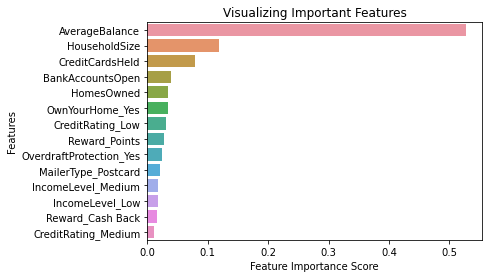

In [69]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Try new model

In [70]:
# Taking into account the above we are going to create a database are the most important columns
# Separate our goal
y = data['OfferAccepted']
# We select the most relevant columns for our prediction
X = data[['AverageBalance','HouseholdSize','CreditCardsHeld']]

In [71]:
# split our data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)
# apply and train KNeighborsClassifier
Kforest=RandomForestClassifier(n_estimators=100)
Kforest.fit(X_train,y_train)
# calculate accuracy
y_pred = Kforest.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of RandomForestClassifier:",accuracy)

Accuracy of RandomForestClassifier: 0.9000556276654923


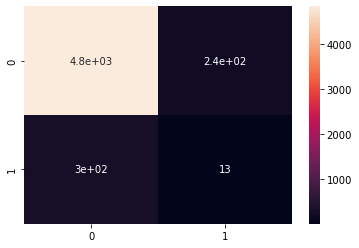

In [72]:
c_m = confusion_matrix(y_test,y_pred)
sns.heatmap(c_m, annot=True)
plt.show()

<AxesSubplot:>

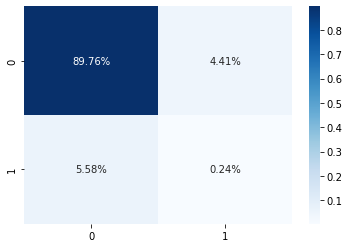

In [73]:
sns.heatmap(c_m/np.sum(c_m), annot=True, fmt='.2%',cmap='Blues')

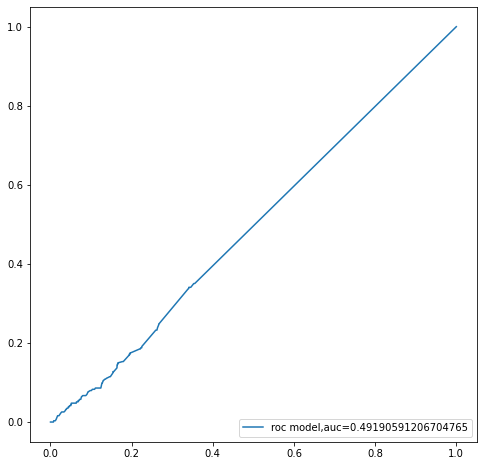

In [74]:
y_test = y_test.apply(fn.yes_no_to_0_1)
fig, (ax) = plt.subplots(1,1, figsize=(8, 8))  
y_pred_probs=Kforest.predict_proba(X_test)[::,1]
#roc_curve plot
fpr,tpr, _ = roc_curve(y_test,y_pred_probs)
auc=roc_auc_score(y_test,y_pred_probs)
ax.plot(fpr,tpr,label='roc model,auc='+str(auc))
ax.legend(loc=4)
plt.show()

### Conclusions

# Extra

In [79]:
data = pd.read_csv("Data/data_profile.csv")
data

,offer_accepted,average_balance,household_size,credit_cards_held,bank_accounts_open,own_your_home,homes_owned,income_level,credit_rating,profiles
0,No,174.50,2,2,1,Yes,1,Medium,High,Non classifiable
1,Yes,1007.50,2,1,2,No,1,High,Low,Non classifiable
2,No,1124.00,4,2,1,Yes,2,High,Low,Non classifiable
3,No,941.00,2,3,1,No,1,High,Low,Non classifiable
4,No,963.00,2,3,1,Yes,1,Low,High,Non classifiable
...,...,...,...,...,...,...,...,...,...,...
17969,No,1230.50,4,1,1,Yes,3,High,High,High Target
17970,No,954.25,4,2,2,No,1,High,High,High Target
17971,No,1188.50,4,2,1,Yes,2,High,High,High Target
17972,No,1221.25,3,1,1,No,1,High,High,High Target


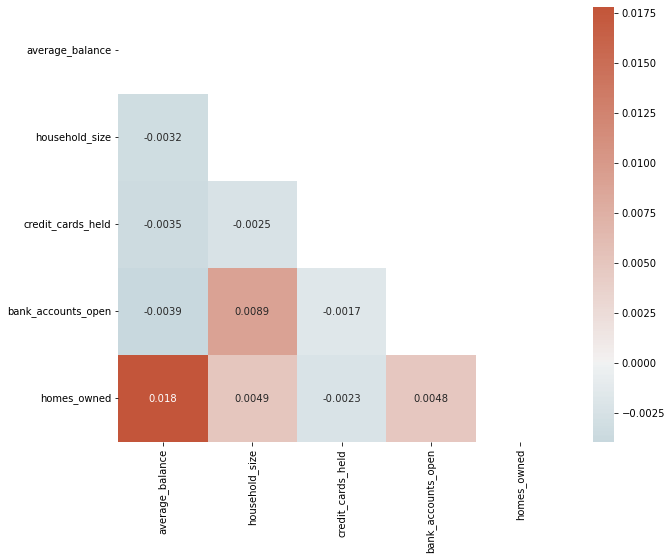

In [80]:
fn.matrix_correlation (data)

## Logistic Regresion

In [87]:
# Separate our goal
y = data['offer_accepted']
# We select the most relevant columns for our prediction
X = data.drop(['offer_accepted'],axis=1)

In [88]:
# Now we return to separate our data into numerical and categorical to be able to treat them separately
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=object)

In [89]:
# Convert categorical variable into dummy/indicator variables.
X_cat_dummies=pd.get_dummies(X_cat, drop_first=True)
X_cat_dummies

,own_your_home_Yes,income_level_Low,income_level_Medium,credit_rating_Low,credit_rating_Medium,profiles_Highest Target,profiles_Low Target,profiles_Medium High Target,profiles_Medium Low Target,profiles_Medium Target,profiles_Non classifiable
0,1,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17969,1,0,0,0,0,0,0,0,0,0,0
17970,0,0,0,0,0,0,0,0,0,0,0
17971,1,0,0,0,0,0,0,0,0,0,0
17972,0,0,0,0,0,0,0,0,0,0,0


In [90]:
X_final = pd.concat([X_cat_dummies,X_num], axis=1)
X_sam, y_sam = fn.smote_sample (X_final,y)

Accuracy of LogisticRegresion: 0.8312198958026148


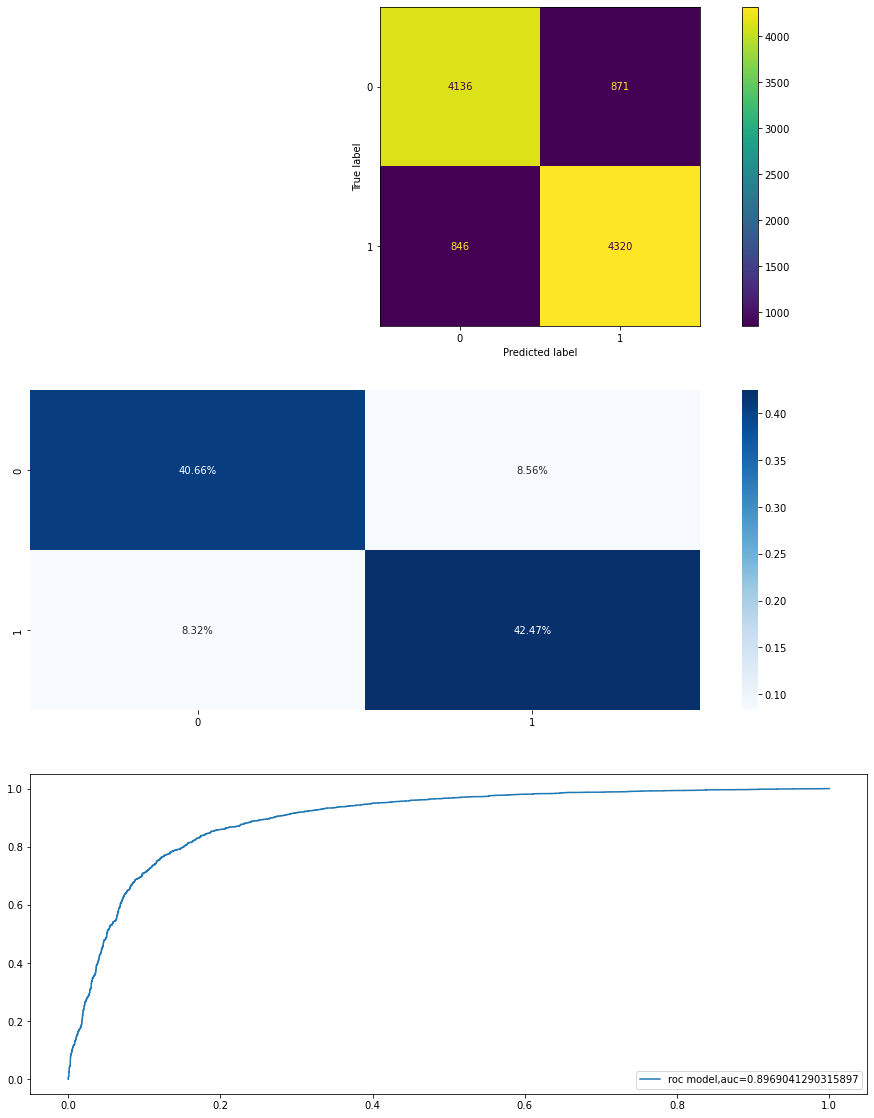

0.8312198958026148

In [91]:
fn.logistic_regresion_train (X_sam,y_sam,1)

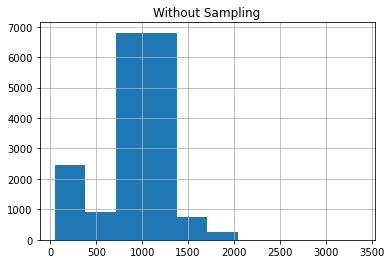

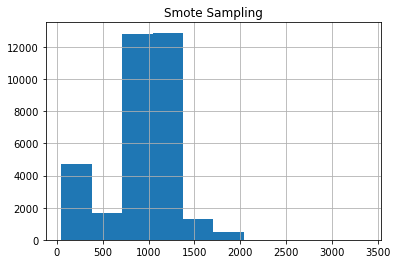

# Conclusions